In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as scispec

## Gaussian TEM00 beam

In [2]:
lambd = 1064e-9                              # wavelength [m] 
k_ = 2*np.pi/lambd                           # wavenumber [1/m]
W_0 = 250e-6                                 # np.sqrt(lambd*z_0/np.pi) # beam radius [m]
z_0 = (W_0**2 * np.pi)/ lambd                # Rayleigh range [m]
W_z = lambda z : W_0*np.sqrt(1 + (z/z_0)**2) # Beam radius [m]
zeta = lambda z : np.arctan(z/z_0)           # gouy phase [arb]
ROC_z = lambda z : z*(1 + (z_0/z)**2)

## Building exponential terms for meshgrid
r_sqrd = lambda x , y : x**2 + y**2
gauexp = lambda a , b : np.exp(- a / b)

In [19]:
vprtsize = 5*W_0                             # Viewport width [m]
x = np.arange(-vprtsize/2,vprtsize/2, 1e-6)
y = x

In [27]:
z = 1*z_0                                    # cross section slice along propogation axis
E_0 = 1
z_const = E_0*(W_0/W_z(z))*np.exp(-1j*(k_*z - zeta(z)))

In [28]:
X , Y = np.meshgrid(x,y)

In [29]:
exp1 = gauexp(r_sqrd(X,Y), (W_z(z))**2)
exp2 = gauexp(1j*k_*r_sqrd(X,Y), 2*ROC_z(z))

In [30]:
gauss_field = z_const*exp1*exp2

In [31]:
gauss_prof = np.abs(gauss_field*np.conj(gauss_field))

In [32]:
gauss_prof

array([[1.86332659e-06, 1.90093786e-06, 1.93924627e-06, ...,
        1.97826338e-06, 1.93924627e-06, 1.90093786e-06],
       [1.90093786e-06, 1.93930833e-06, 1.97838999e-06, ...,
        2.01819466e-06, 1.97838999e-06, 1.93930833e-06],
       [1.93924627e-06, 1.97838999e-06, 2.01825924e-06, ...,
        2.05886607e-06, 2.01825924e-06, 1.97838999e-06],
       ...,
       [1.97826338e-06, 2.01819466e-06, 2.05886607e-06, ...,
        2.10028989e-06, 2.05886607e-06, 2.01819466e-06],
       [1.93924627e-06, 1.97838999e-06, 2.01825924e-06, ...,
        2.05886607e-06, 2.01825924e-06, 1.97838999e-06],
       [1.90093786e-06, 1.93930833e-06, 1.97838999e-06, ...,
        2.01819466e-06, 1.97838999e-06, 1.93930833e-06]])

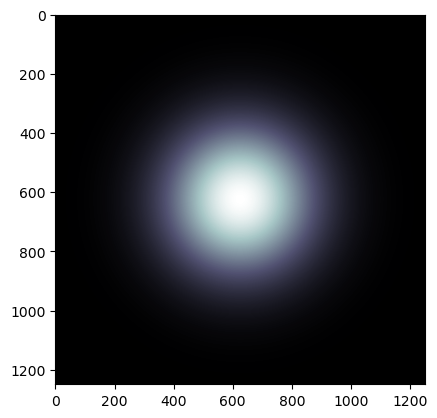

In [35]:
plt.imshow(gauss_prof, vmin=0, vmax=gauss_prof.max(), cmap='bone')

# Plotting Hermite-Gauss beam profiles

### Establish HG basis

In [2]:
scispec.hermite?

Signature: scispec.hermite(n, monic=False)
Docstring:
Physicist's Hermite polynomial.

Defined by

.. math::

    H_n(x) = (-1)^ne^{x^2}\frac{d^n}{dx^n}e^{-x^2};

:math:`H_n` is a polynomial of degree :math:`n`.

Parameters
----------
n : int
    Degree of the polynomial.
monic : bool, optional
    If `True`, scale the leading coefficient to be 1. Default is
    `False`.

Returns
-------
H : orthopoly1d
    Hermite polynomial.

Notes
-----
The polynomials :math:`H_n` are orthogonal over :math:`(-\infty,
\infty)` with weight function :math:`e^{-x^2}`.

Examples
--------
>>> from scipy import special
>>> import matplotlib.pyplot as plt
>>> import numpy as np

>>> p_monic = special.hermite(3, monic=True)
>>> p_monic
poly1d([ 1. ,  0. , -1.5,  0. ])
>>> p_monic(1)
-0.49999999999999983
>>> x = np.linspace(-3, 3, 400)
>>> y = p_monic(x)
>>> plt.plot(x, y)
>>> plt.title("Monic Hermite polynomial of degree 3")
>>> plt.xlabel("x")
>>> plt.ylabel("H_3(x)")
>>> plt.show()
File:      ~/miniconda3/

In [3]:
# Size of plotting grid
n = range(0,6)
m = n

### Estalish HG field form

In [ ]:
def TEM00(X, Y, z, W_0, z_0, lambd=1064e-9):
    k = 2*np.pi/lambd
    z_0 = (W_0**2*np.pi)/lambd
    zeta = lambda z : W_0*np.sqrt(1+(z/z_0)**2)
    W_z = lambda z : W_0*np.sqrt(1 + (z/z_0)**2) # Beam radius [m]
    ROC_z = lambda z : z*(1 + (z_0/z)**2)        # Beam ROC [m]
    

## Establish LG basis

In [6]:
scispec.genlaguerre?

Signature: scispec.genlaguerre(n, alpha, monic=False)
Docstring:
Generalized (associated) Laguerre polynomial.

Defined to be the solution of

.. math::
    x\frac{d^2}{dx^2}L_n^{(\alpha)}
      + (\alpha + 1 - x)\frac{d}{dx}L_n^{(\alpha)}
      + nL_n^{(\alpha)} = 0,

where :math:`\alpha > -1`; :math:`L_n^{(\alpha)}` is a polynomial
of degree :math:`n`.

Parameters
----------
n : int
    Degree of the polynomial.
alpha : float
    Parameter, must be greater than -1.
monic : bool, optional
    If `True`, scale the leading coefficient to be 1. Default is
    `False`.

Returns
-------
L : orthopoly1d
    Generalized Laguerre polynomial.

Notes
-----
For fixed :math:`\alpha`, the polynomials :math:`L_n^{(\alpha)}`
are orthogonal over :math:`[0, \infty)` with weight function
:math:`e^{-x}x^\alpha`.

The Laguerre polynomials are the special case where :math:`\alpha
= 0`.

See Also
--------
laguerre : Laguerre polynomial.
hyp1f1 : confluent hypergeometric function

References
----------
.. [

## Establish LG field form